<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Taller 3 </h1>

<H2 align='center'> Máxima Inverosimilitud </H2>
<H4 align='center'> Vicente Robles</H3>
<H4 align='center'> Félix Vergara </H3>

<hr style="height:2px;border:none"/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# descomprimir archivos csv desde zip
!cp -r /content/drive/My\ Drive/Machine\ learning/modelamiento-de-supervivencia-de-pacientes-en-uci.zip ./modelamiento-de-supervivencia-de-pacientes-en-uci.zip

!unzip -oq modelamiento-de-supervivencia-de-pacientes-en-uci.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/df_train.csv")

In [ ]:
pd.set_option('display.max_columns', 500)
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,98554,3413,60,0,NaN,28.357077,0,Asian,NaN,154.90,Emergency Department,Accident & Emergency,538,admit,Med-Surg ICU,0.201389,0,68.04,2.6,113.0,501.06,0,0.0,0.8,9.0,0.60,NaN,4.0,6.0,0.0,5.0,145.0,145.0,21.0,0.0,47.0,NaN,NaN,NaN,NaN,58.0,136.0,NaN,1296.8640,0.0,2.10,NaN,NaN,62.0,33.0,62.0,33.0,145.0,68.0,NaN,NaN,87.0,47.0,87.0,47.0,76.0,3.0,100.0,95.0,NaN,NaN,121.0,71.0,121.0,71.0,38.5,31.889,NaN,NaN,43.0,40.0,43.0,40.0,114.0,109.0,NaN,NaN,54.0,47.0,54.0,47.0,22.0,7.0,100.0,100.0,NaN,NaN,75.0,71.0,75.0,71.0,NaN,NaN,2.6,2.6,0.8,0.8,7.0,7.0,7.1,7.1,0.60,0.60,127.0,127.0,19.0,19.0,7.0,7.0,21.0,21.0,NaN,NaN,NaN,NaN,69.0,69.0,3.7,3.7,137.0,137.0,2.10,2.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,70232,19980,139,0,NaN,24.547793,1,African American,NaN,154.90,NaN,Operating R

#EDA

Vemos cuantos valores nan existen en cada columna

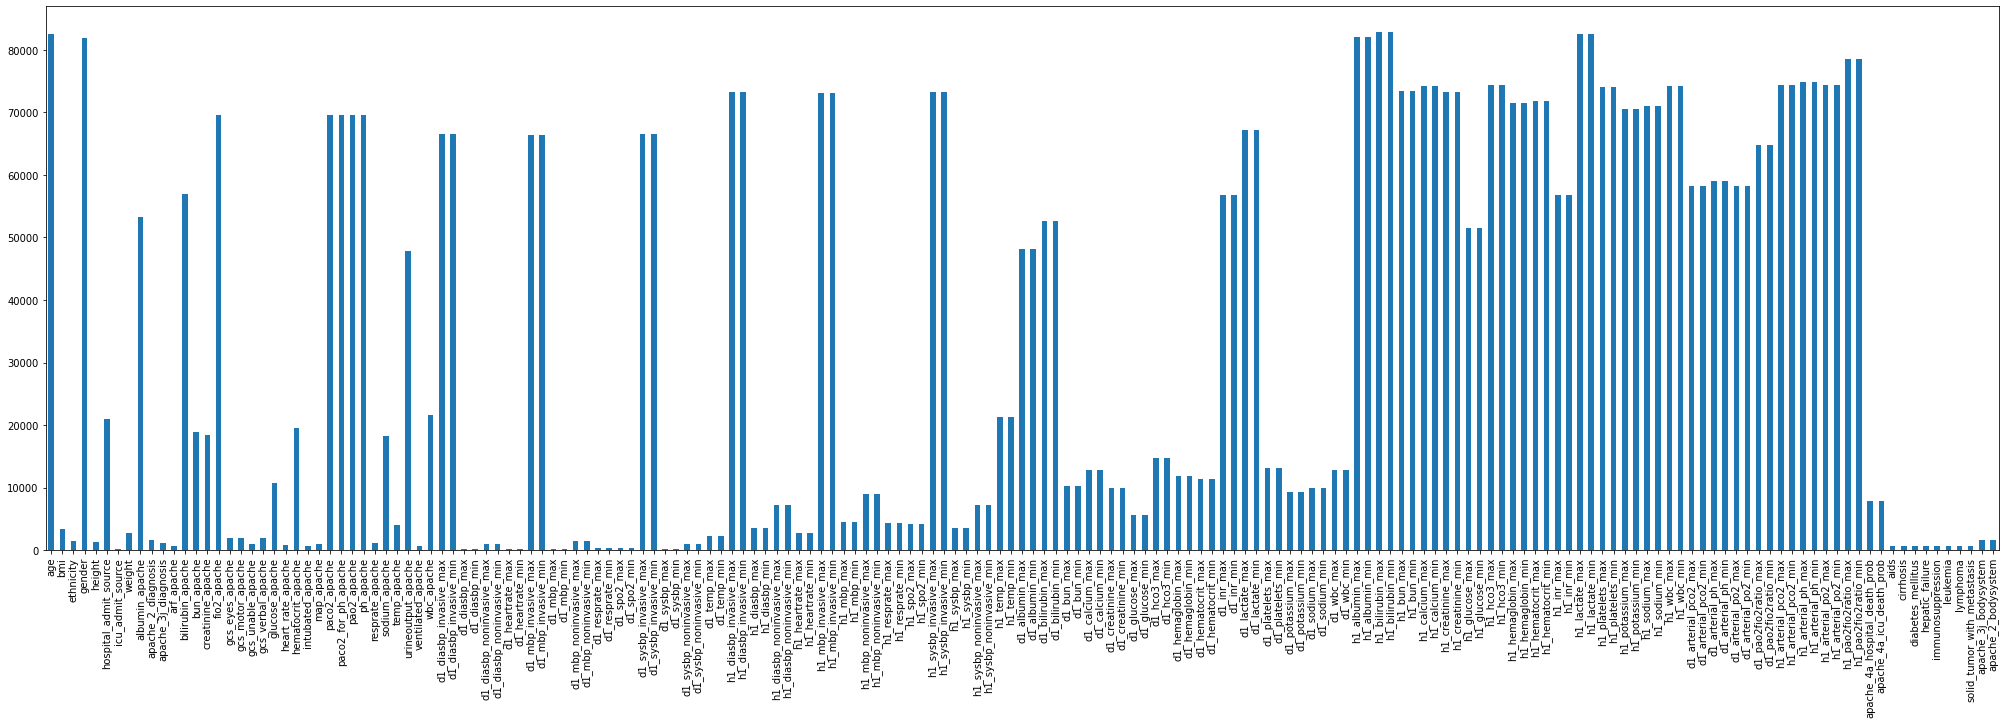

In [ ]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar',figsize=(35,10))

In [ ]:
mean_height_F=df[df['gender']=='F']['height'].mean()
mean_height_M=df[df['gender']=='M']['height'].mean()
std_height_F=df[df['gender']=='F']['height'].std()
std_height_M=df[df['gender']=='M']['height'].std()

In [ ]:
mean_umbral=(mean_height_F+std_height_F+mean_height_M-std_height_M)/2

In [ ]:
mean_umbral

168.3128321886918

In [ ]:
def gender_values(x):
    if pd.isnull(x['gender']) and x['height']>mean_umbral:
      return 'M'
    elif pd.isnull(x['gender']) and x['height']<=mean_umbral:
      return 'F'
    else:
      return x['gender']

In [ ]:
df['gender'][df['gender']=='M'].shape

(4081,)

In [ ]:
df['gender'][df['gender']=='F'].shape

(3653,)

In [ ]:
df['gender']=df.apply(gender_values,axis=1)

In [ ]:
df['gender'][df['gender']=='M'].shape

(46809,)

In [ ]:
df['gender'][df['gender']=='F'].shape

(41784,)

In [ ]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,98554,3413,60,0,NaN,28.357077,0,Asian,F,154.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,70232,19980,139,0,NaN,24.547793,1,African American,F,154.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
2,24701,54659,39,0,NaN,24.284760,1,Caucasian,M,172.70,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses
3,68593,8469,176,0,NaN,35.045481,0,Caucasian,F,144.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
4,103103,124128,182,0,NaN,19.010652,0,Caucasian,M,180.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89708,52840,14469,188,0,NaN,14.844926,0,Caucasian,M,170.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
89709,107834,123189,19,1,63.0,25.148009,0,Caucasian,M,177.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
89710,125869,107796,21,0,NaN,25.369438,1,Caucasian,M,177.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
89711,115795,105886,10,0,NaN,31.703948,1,African American,M,185.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Musculoskeletal/Skin,Undefined diagnoses


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [ ]:
cont_vars = list(newdf.columns)
def outliers_visual(data):
    i = 0
    plt.figure(figsize=(50, 500))
    for col in cont_vars:
        i += 1
        plt.subplot(int(newdf.shape[1]/4)*2+2, 4, i)
        sns.boxplot(x=data[col])
        plt.ylabel(col,fontsize=15)
        i += 1
        plt.subplot(int(newdf.shape[1]/4)*2+2, 4, i)
        plt.hist(data[col],bins=100)
        plt.ylabel(col,fontsize=15)
    plt.show()
outliers_visual(newdf)

Usaremos algunas distribuciones para calcular su esperanza y reemplazar valores faltantes.

In [ ]:
from scipy.stats import t,norm,lognorm,chi,gamma

Normal:
$$f(x)=\frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution ')]

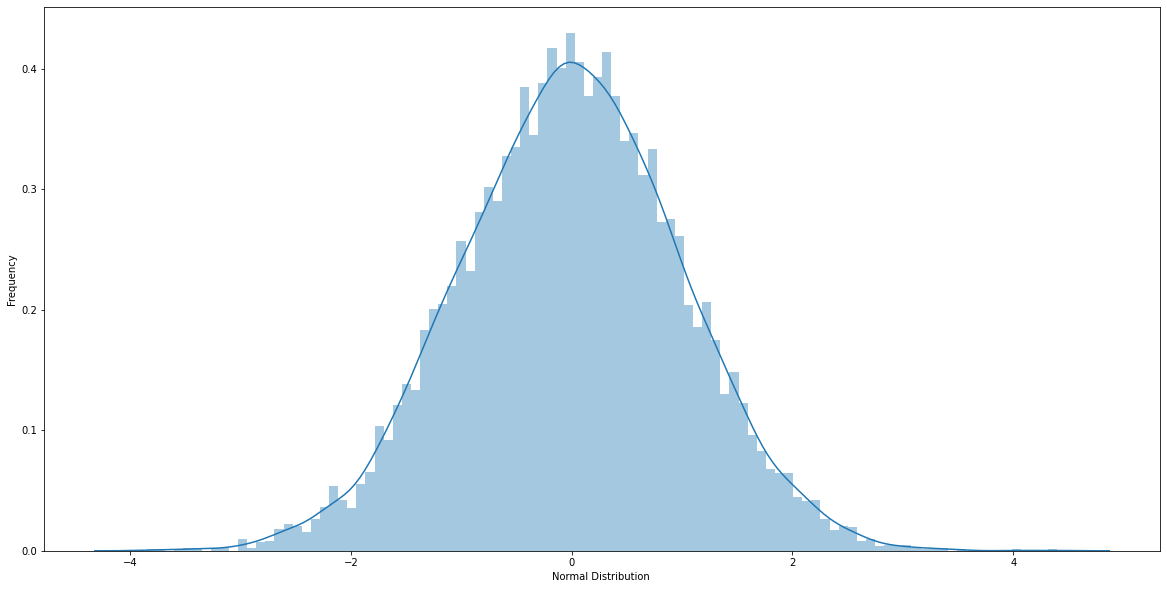

In [ ]:
normal=norm.rvs(size=10000)
plt.figure(figsize=(20,10))
ax = sns.distplot(normal,
                  bins=100,
                  kde=True,)
ax.set(xlabel='Normal Distribution ', ylabel='Frequency')

Log-normal:
$$f(x)=\frac{1}{x\sigma \sqrt{2\pi}}e^{\frac{-(\ln{x}-\mu)^2}{2\sigma^2}}$$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Log-Normal Distribution ')]

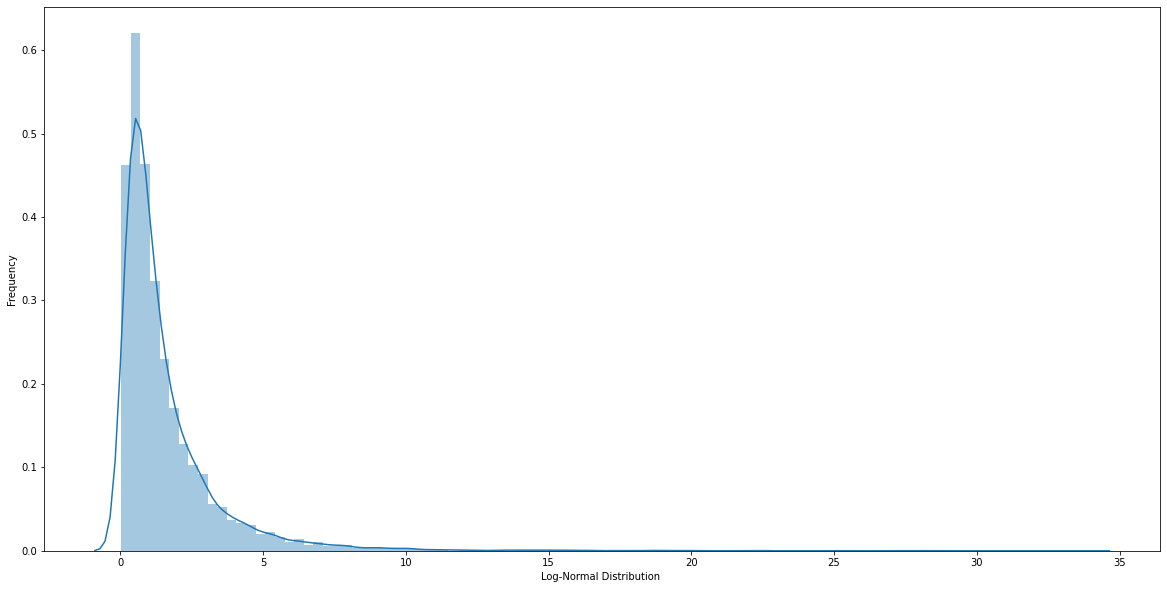

In [ ]:
lognormal=lognorm.rvs(1,size=10000)
plt.figure(figsize=(20,10))
ax = sns.distplot(lognormal,
                  bins=100,
                  kde=True,)
ax.set(xlabel='Log-Normal Distribution ', ylabel='Frequency')

Chi:
$$f(x)=\frac{1}{2^{(k/2-1)} \Gamma (k/2)} x^{k-1} e^{-x^2/2} $$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Chi Distribution ')]

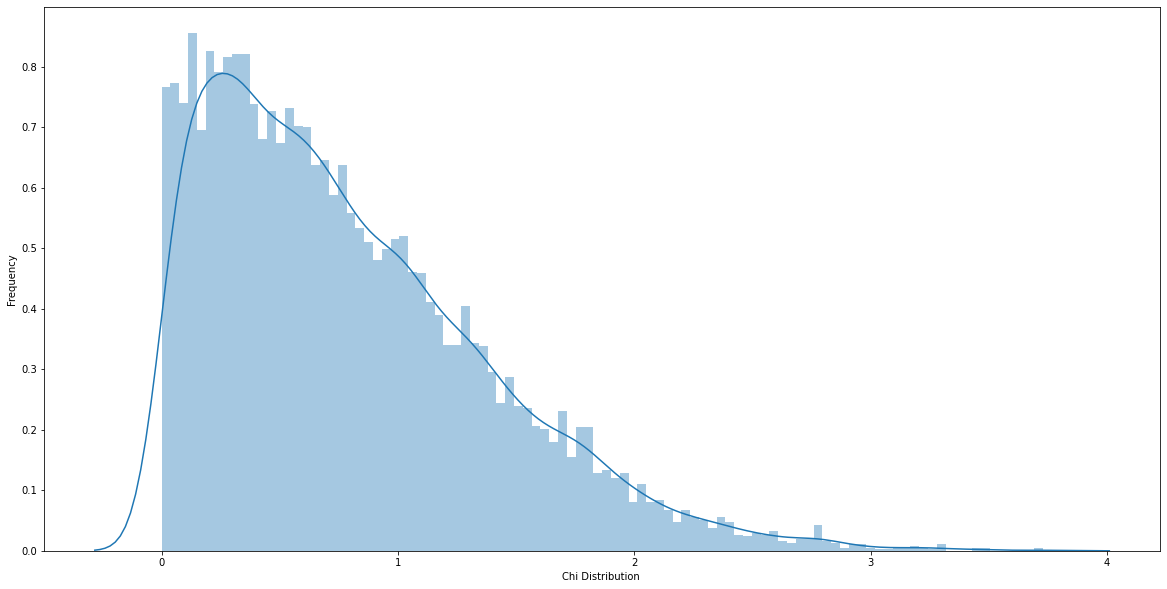

In [ ]:
chidist=chi.rvs(1,size=10000)
plt.figure(figsize=(20,10))
ax = sns.distplot(chidist,
                  bins=100,
                  kde=True,)
ax.set(xlabel='Chi Distribution ', ylabel='Frequency')

Gamma:
$$f(x)=\frac{x^{k-1}e^{-x/\theta}}{\Gamma(k)\theta^k}$$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Chi Distribution ')]

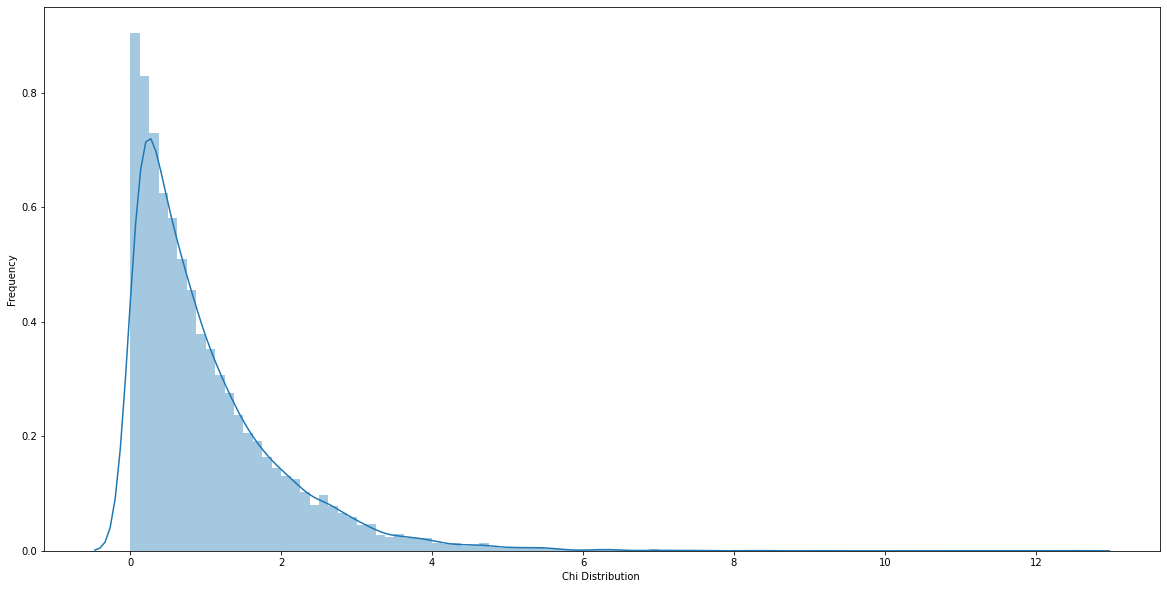

In [ ]:
gammadist=gamma.rvs(1,size=10000)
plt.figure(figsize=(20,10))
ax = sns.distplot(gammadist,
                  bins=100,
                  kde=True,)
ax.set(xlabel='gamma Distribution ', ylabel='Frequency')

t:
$$f(x)=\frac{\Gamma((\nu+1)/2)}{\sqrt{\nu \pi}\Gamma(\nu/2)}(1+x^2/\nu)^{-(\nu+1)/2}$$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 't Distribution ')]

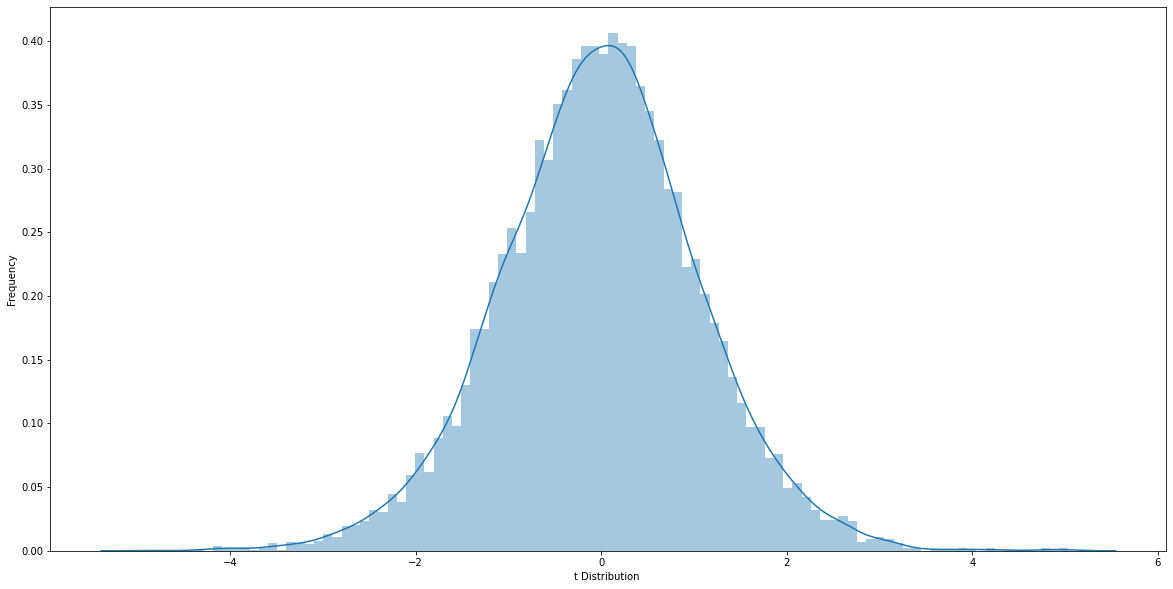

In [ ]:
tdist=t.rvs(15,size=10000)
plt.figure(figsize=(20,10))
ax = sns.distplot(tdist,
                  bins=100,
                  kde=True,)
ax.set(xlabel='t Distribution ', ylabel='Frequency')

Vemos la distribucion de cada variable y agregamos la esperanza de cada variable según su distribución de probabilidad

In [ ]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "lognorm", "chi", "gamma", "t"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        try:
          param = dist.fit(data)
        except:
          pass
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [ ]:
df_distribution=pd.DataFrame()
lista_distribucion=[]
for columna in newdf:
  columna_distribucion=pd.Series(newdf[pd.isnull(newdf[columna])==False][columna])
  lista_distribucion.append(get_best_distribution(columna_distribucion))

p value for norm = 7.230206367549458e-257
p value for lognorm = 0.0
p value for chi = 7.796188678251261e-258
p value for gamma = 2.3904189182904008e-257
p value for t = 1.9885291944401842e-256
Best fitting distribution: t
Best p value: 1.9885291944401842e-256
Parameters for the best fit: (20003135.596423358, 65620.16426269224, 37799.95175123801)
p value for norm = 2.3508036328115e-256
p value for lognorm = 0.0
p value for chi = 8.709043206033202e-259
p value for gamma = 2.487063569983159e-256
p value for t = 3.692484884624682e-256
Best fitting distribution: t
Best p value: 3.692484884624682e-256
Parameters for the best fit: (7559184.638468809, 65526.44551200792, 37812.971823242166)
p value for norm = 0.0
p value for lognorm = 0.0
p value for chi = 0.0
p value for gamma = 0.0
p value for t = 0.0
Best fitting distribution: norm
Best p value: 0.0
Parameters for the best fit: (105.69618672879069, 62.834117370459644)
p value for norm = 0.0
p value for lognorm = 0.0
p value for chi = 0.0
p v

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1953: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


p value for lognorm = 0.0
p value for chi = 0.0
p value for gamma = 0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:406: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


p value for t = 0.0
Best fitting distribution: norm
Best p value: nan
Parameters for the best fit: (0.0, 0.0)
p value for norm = 0.0
p value for lognorm = 1.9104465689882213e-19
p value for chi = 0.0
p value for gamma = 6.1564402810124655e-28
p value for t = 0.0
Best fitting distribution: lognorm
Best p value: 1.9104465689882213e-19
Parameters for the best fit: (0.32444917739975637, 9.32380672517742, 70.89286861209425)
p value for norm = 5.478115640876244e-60
p value for lognorm = 5.137000515299773e-64
p value for chi = 5.0915087284508936e-76
p value for gamma = 3.3227370921922624e-77
p value for t = 5.872707617906014e-60
Best fitting distribution: t
Best p value: 5.872707617906014e-60
Parameters for the best fit: (4949024.102149986, 2.908573452932775, 0.6804392713820557)
p value for norm = 0.0
p value for lognorm = 0.0
p value for chi = 0.0
p value for gamma = 0.0
p value for t = 0.0
Best fitting distribution: norm
Best p value: 0.0
Parameters for the best fit: (185.62643038779402, 86

In [ ]:
from scipy.stats import t,norm,lognorm,chi,gamma
diccionario={}
cont=0
for columna in newdf.columns:
  if lista_distribucion[cont][0]=='norm':
    expected=norm.expect(loc=lista_distribucion[cont][2][0],scale=lista_distribucion[cont][2][1])
  elif lista_distribucion[cont][0]=='lognorm':
    expected=lognorm.expect(args=(lista_distribucion[cont][2][0],),loc=lista_distribucion[cont][2][1],scale=lista_distribucion[cont][2][2])
  elif lista_distribucion[cont][0]=='chi':
    expected=chi.expect(args=(lista_distribucion[cont][2][0],),loc=lista_distribucion[cont][2][1],scale=lista_distribucion[cont][2][2])
  elif lista_distribucion[cont][0]=='gamma':
    expected=gamma.expect(args=(lista_distribucion[cont][2][0],),loc=lista_distribucion[cont][2][1],scale=lista_distribucion[cont][2][2])
  elif lista_distribucion[cont][0]=='t':
    expected=t.expect(args=(lista_distribucion[cont][2][0],),loc=lista_distribucion[cont][2][1],scale=lista_distribucion[cont][2][2])
  diccionario[columna]=expected
  cont+=1

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2738: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  vals = integrate.quad(fun, lb, ub, **kwds)[0] / invfac
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2727: RuntimeWarning: invalid value encountered in double_scalars
  lb = loc + _a * scale
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2729: RuntimeWarning: invalid value encountered in double_scalars
  ub = loc + _b * scale
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2738: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  vals = integra

In [ ]:
for columna in newdf:
  if diccionario[columna]!=np.nan:
    df[columna]=df[columna].replace(np.nan,diccionario[columna])
  else:
    df[columna]=df[columna].replace(np.nan,df[columna].median())

Para variables categóricas aparte de las ya tratadas ocuparemos una nueva categoria como 'not known'

In [ ]:
newdf2 = df.select_dtypes(object)

In [ ]:
newdf2

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Asian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Sepsis,Cardiovascular
1,African American,F,NaN,Operating Room / Recovery,admit,Cardiac ICU,Cardiovascular,Cardiovascular
2,Caucasian,M,Operating Room,Operating Room / Recovery,admit,CCU-CTICU,Cardiovascular,Undefined diagnoses
3,Caucasian,F,Direct Admit,Accident & Emergency,admit,MICU,Sepsis,Cardiovascular
4,Caucasian,M,Acute Care/Floor,Floor,admit,MICU,Neurological,Neurologic
...,...,...,...,...,...,...,...,...
89708,Caucasian,M,Acute Care/Floor,Floor,admit,MICU,NaN,NaN
89709,Caucasian,M,Emergency Department,Accident & Emergency,admit,Neuro ICU,Neurological,Neurologic
89710,Caucasian,M,Other Hospital,Operating Room / Recovery,admit,CCU-CTICU,Cardiovascular,Cardiovascular
89711,African American,M,Recovery Room,Operating Room / Recovery,admit,Cardiac ICU,Musculoskeletal/Skin,Undefined diagnoses


In [ ]:
for columna in newdf2:
  df[columna]=df[columna].replace(np.nan,'not known')

Finalmente obtenemos el dataframe sin valores nan

In [ ]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,98554,3413,60,0,67.813742,28.357077,0,Asian,F,154.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,70232,19980,139,0,67.813742,24.547793,1,African American,F,154.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
2,24701,54659,39,0,67.813742,24.284760,1,Caucasian,M,172.70,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses
3,68593,8469,176,0,67.813742,35.045481,0,Caucasian,F,144.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
4,103103,124128,182,0,67.813742,19.010652,0,Caucasian,M,180.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89708,52840,14469,188,0,67.813742,14.844926,0,Caucasian,M,170.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not known,not known
89709,107834,123189,19,1,63.000000,25.148009,0,Caucasian,M,177.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
89710,125869,107796,21,0,67.813742,25.369438,1,Caucasian,M,177.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
89711,115795,105886,10,0,67.813742,31.703948,1,African American,M,185.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Musculoskeletal/Skin,Undefined diagnoses


Vemos la distribución de las clases

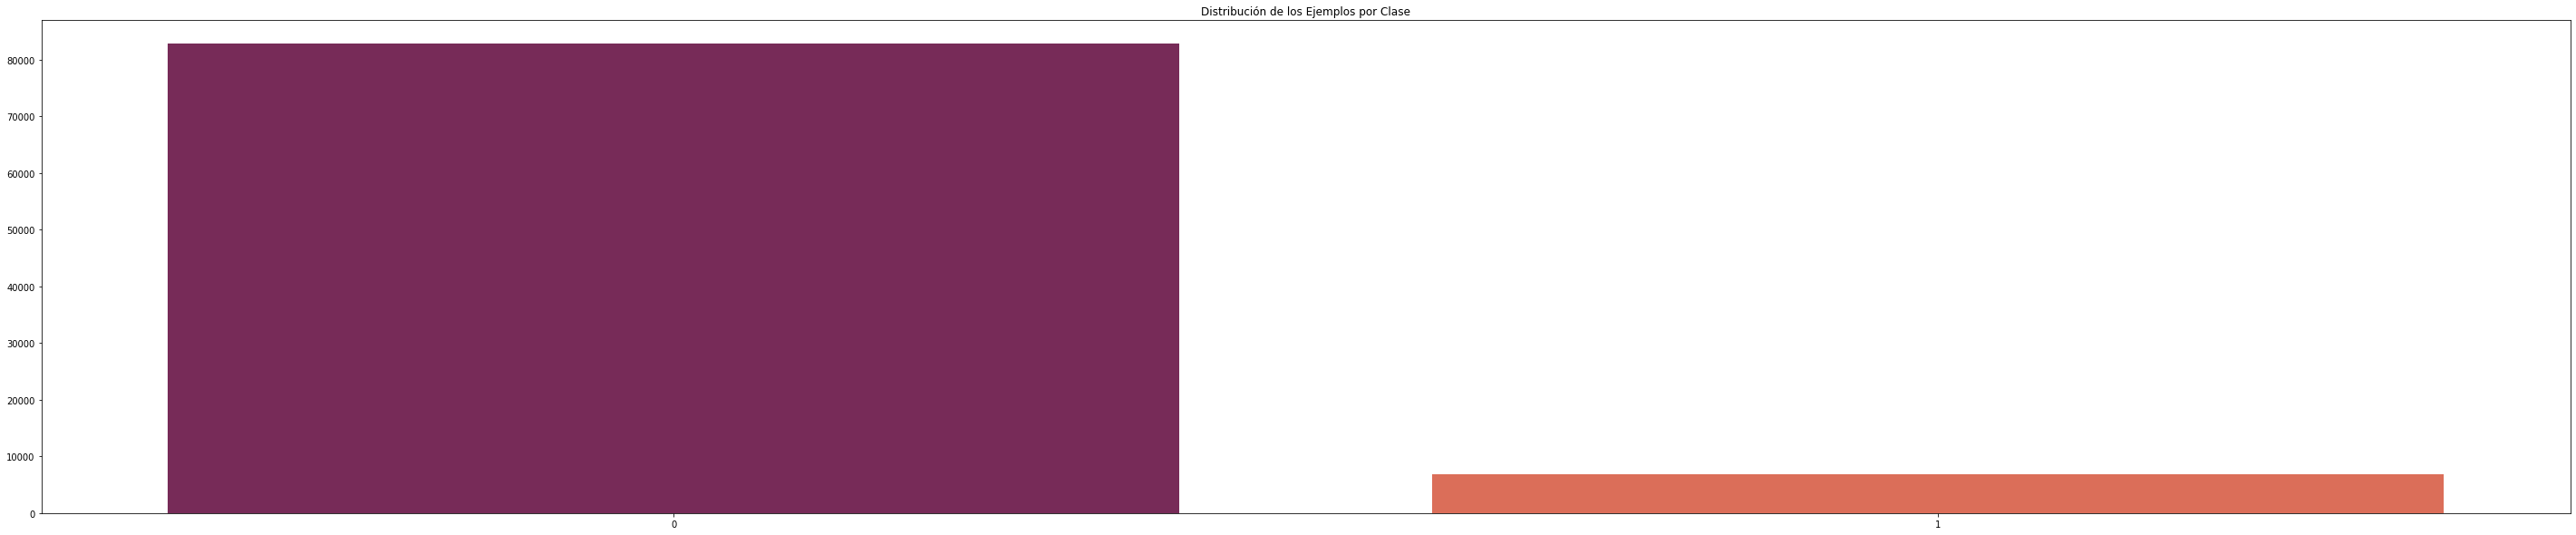

In [ ]:
clases, frecuencia = np.unique(df['hospital_death'], return_counts=True)

fig, ax = plt.subplots(figsize=(50,10),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

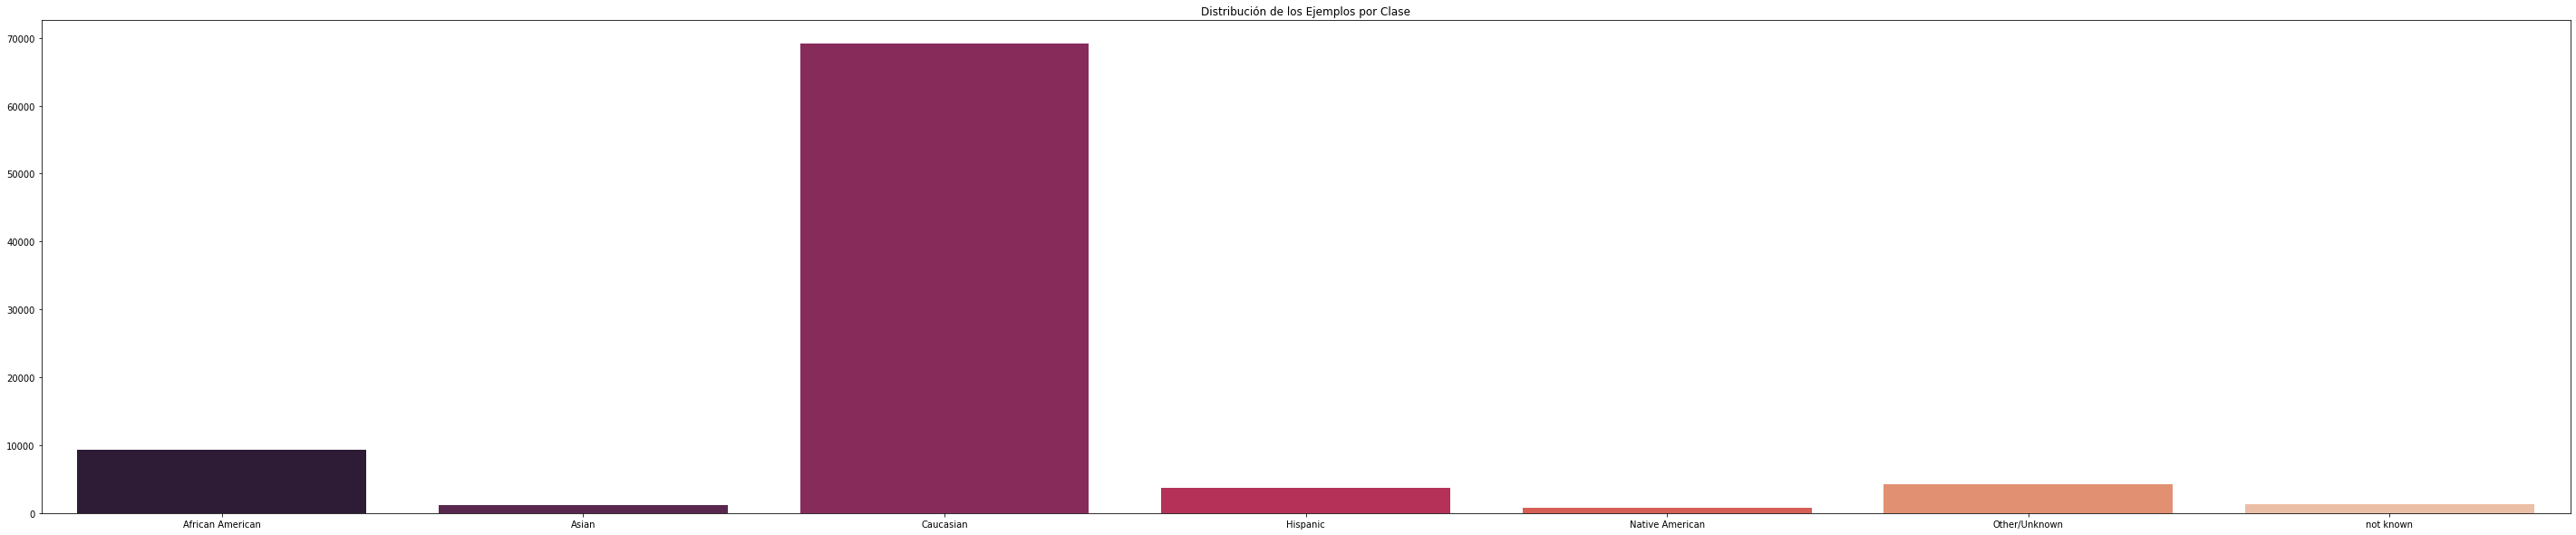

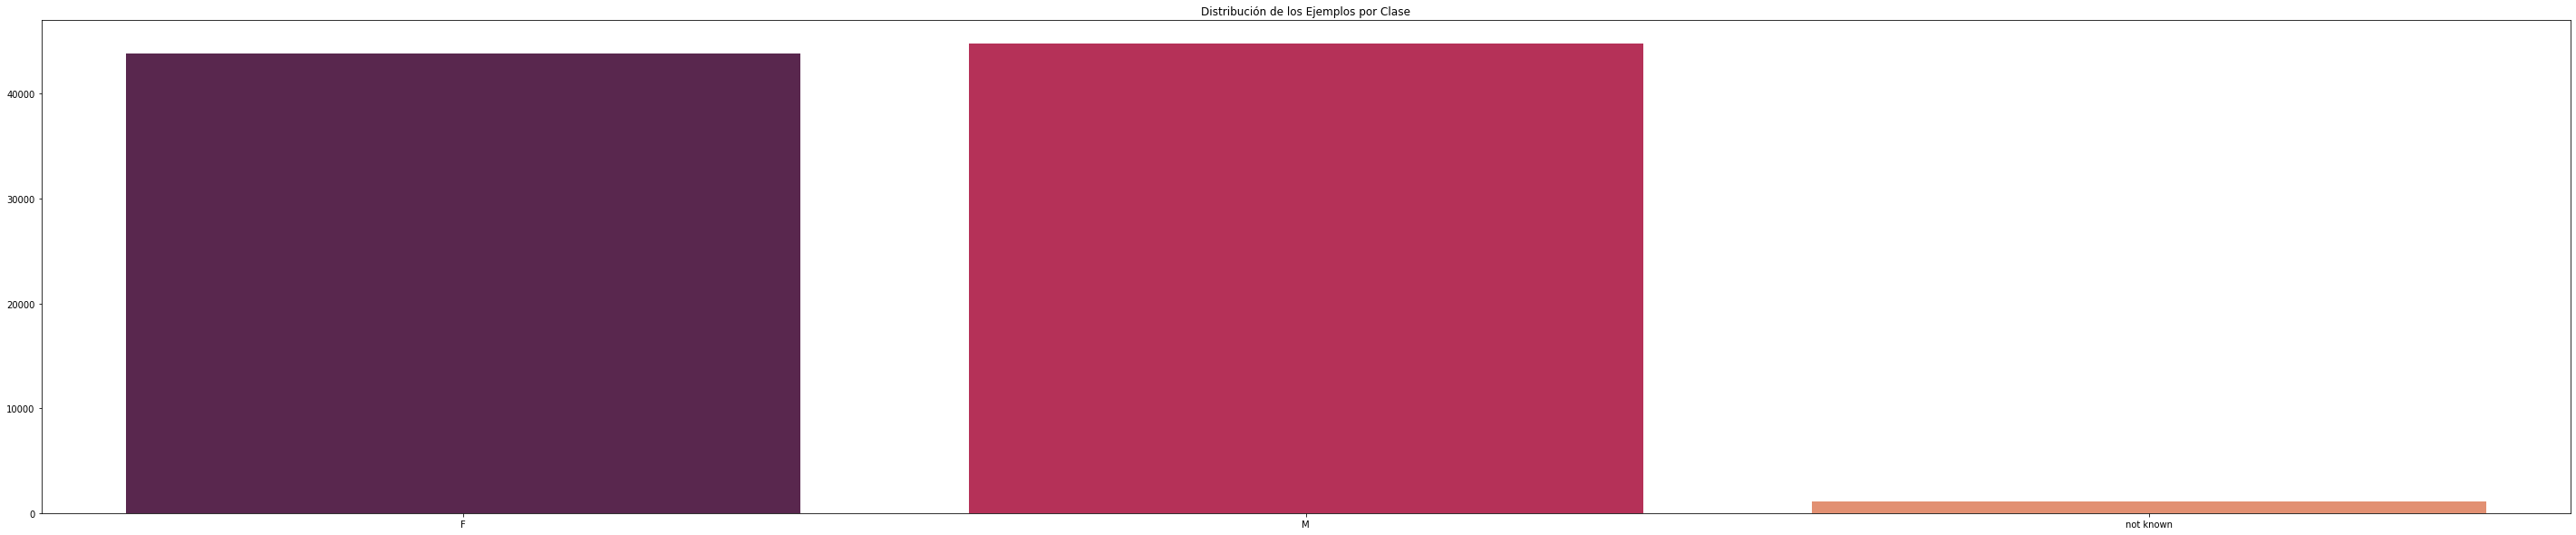

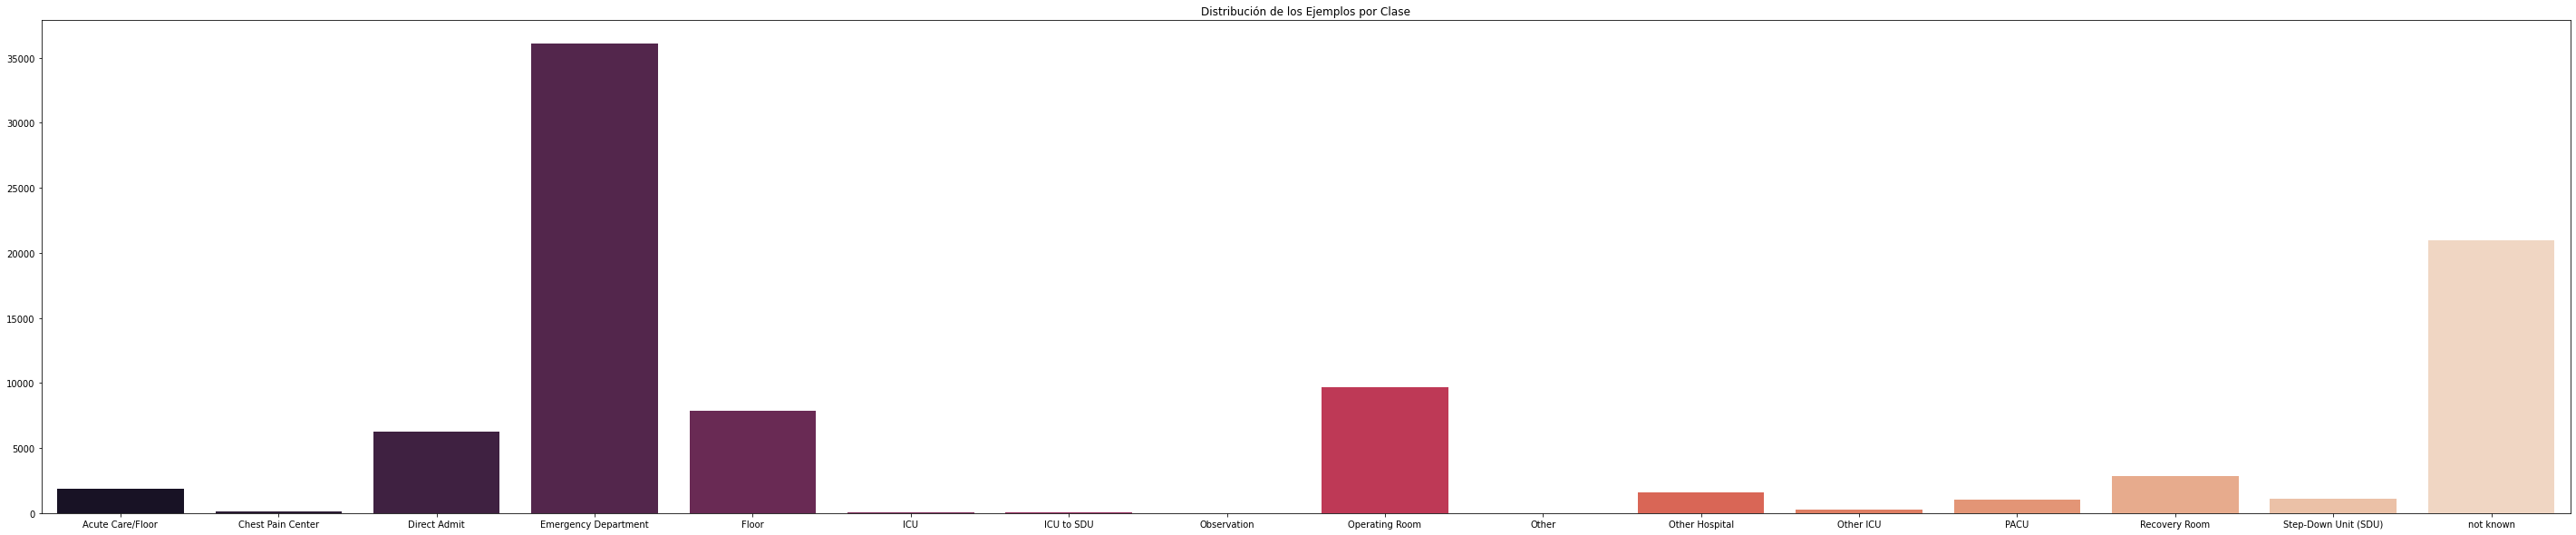

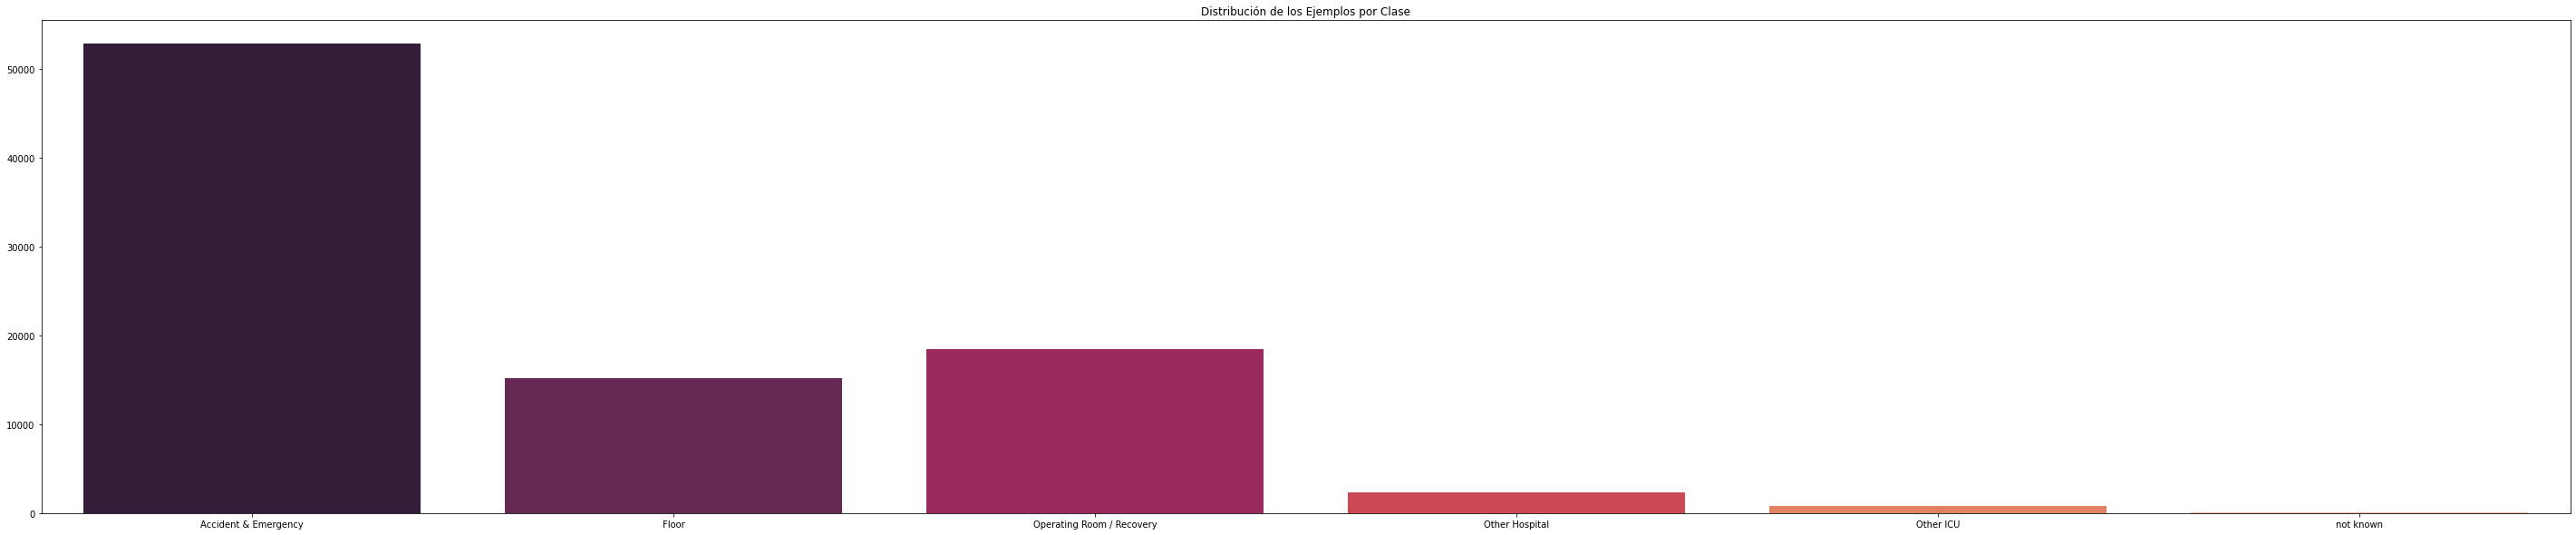

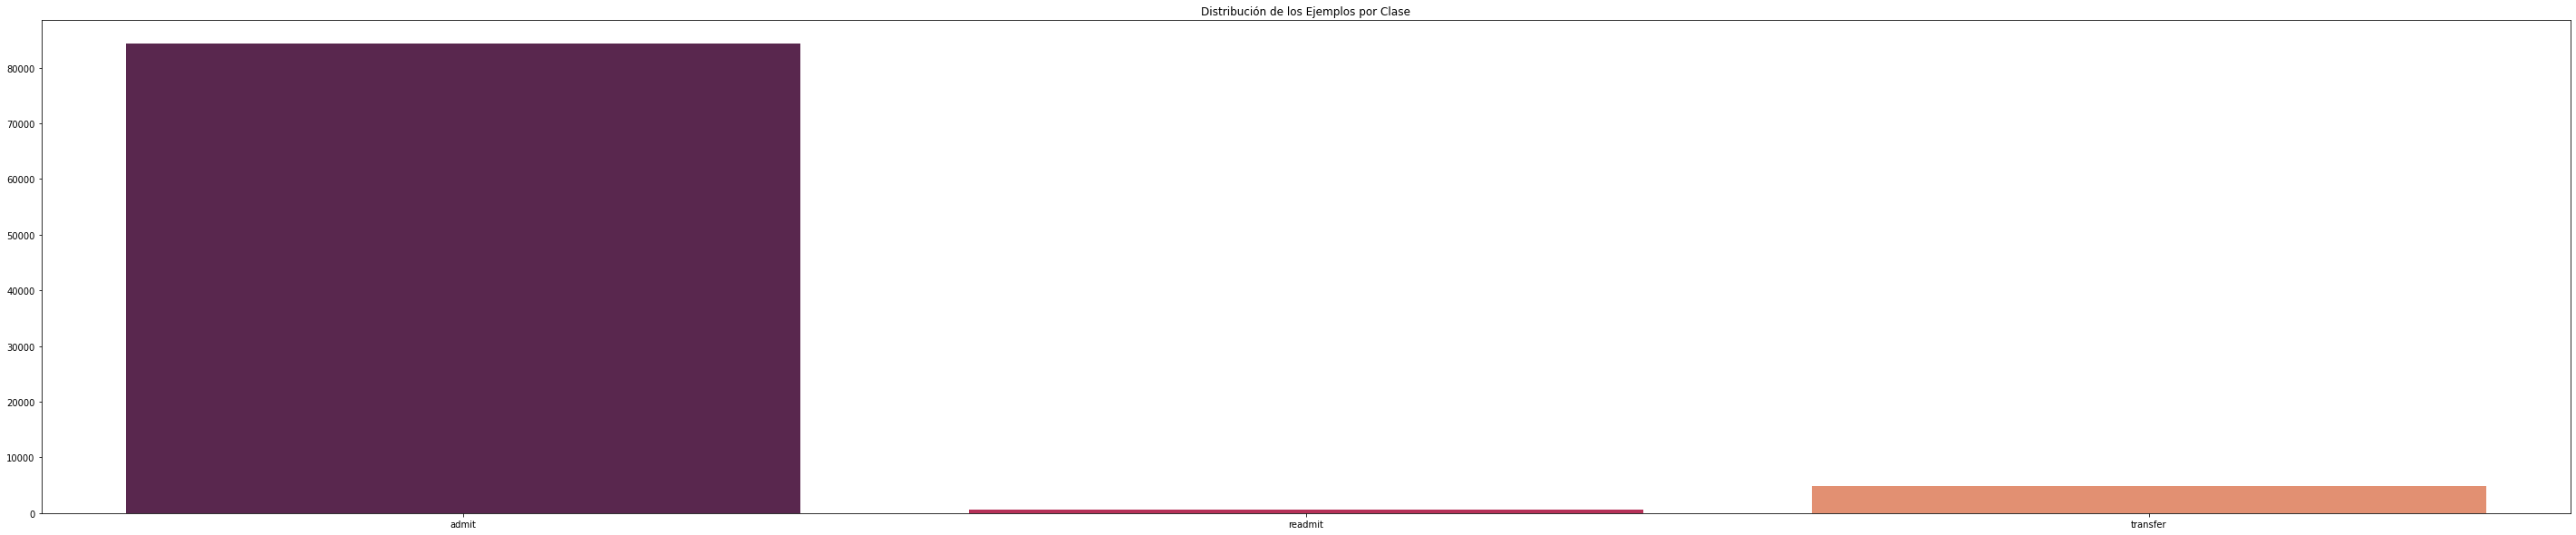

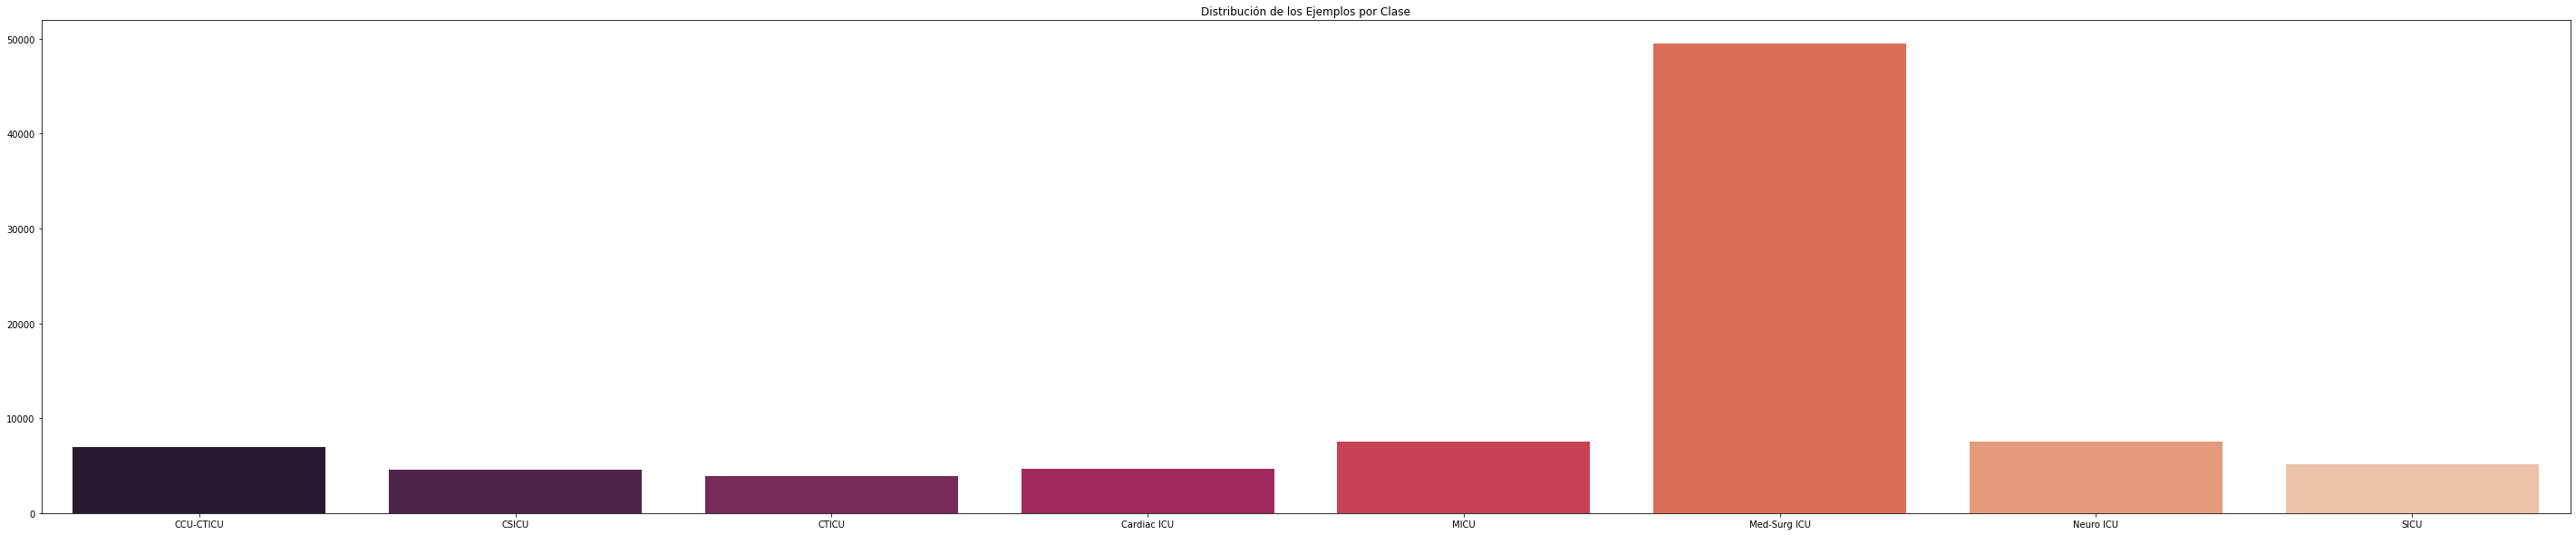

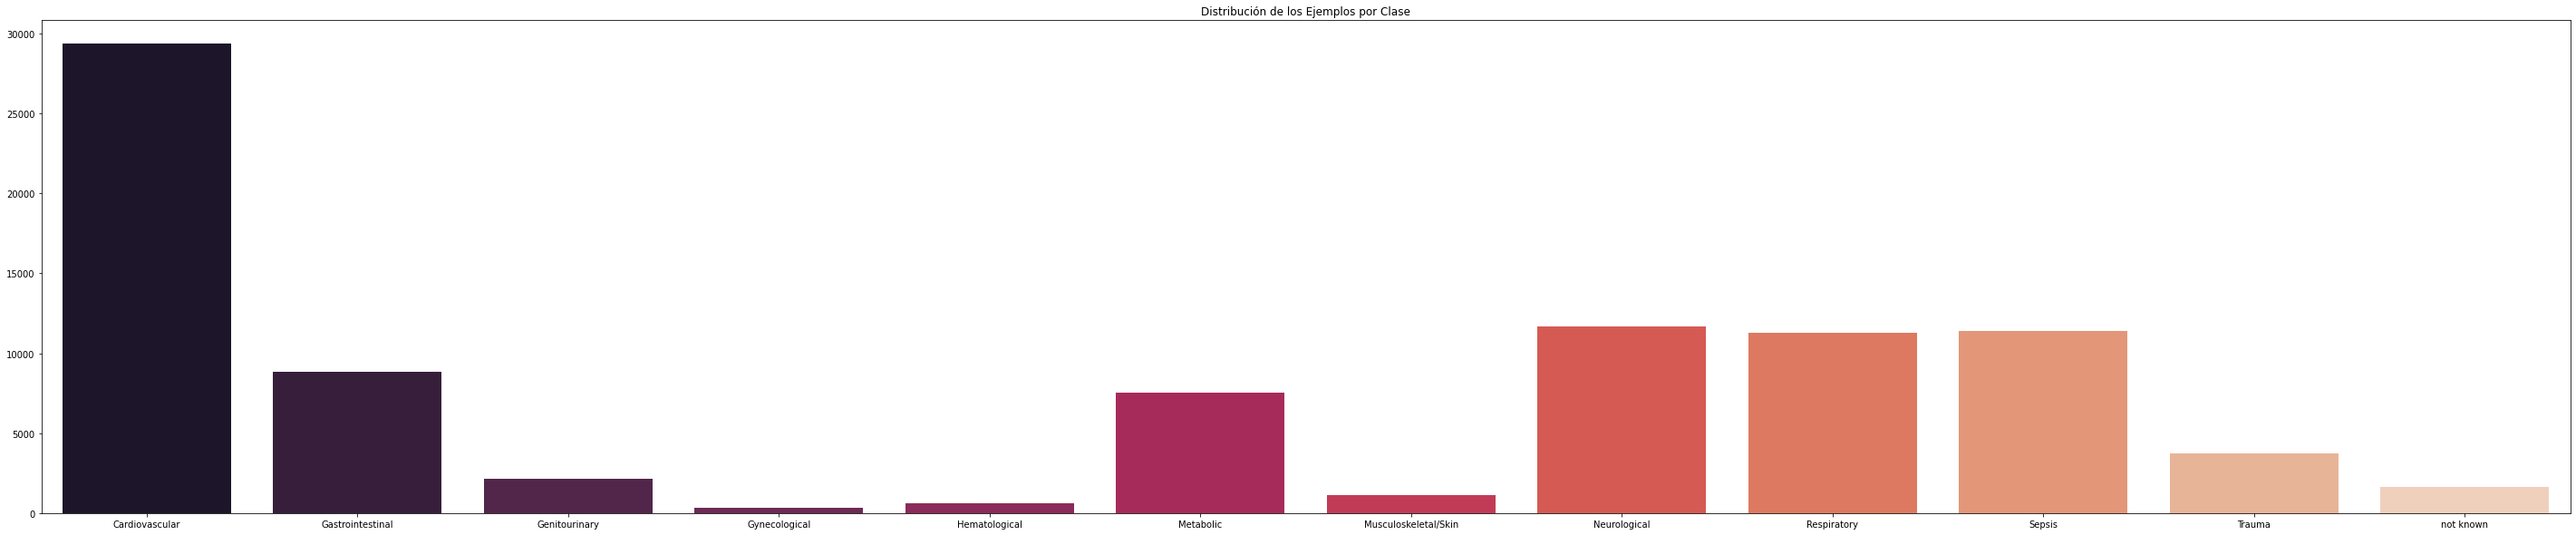

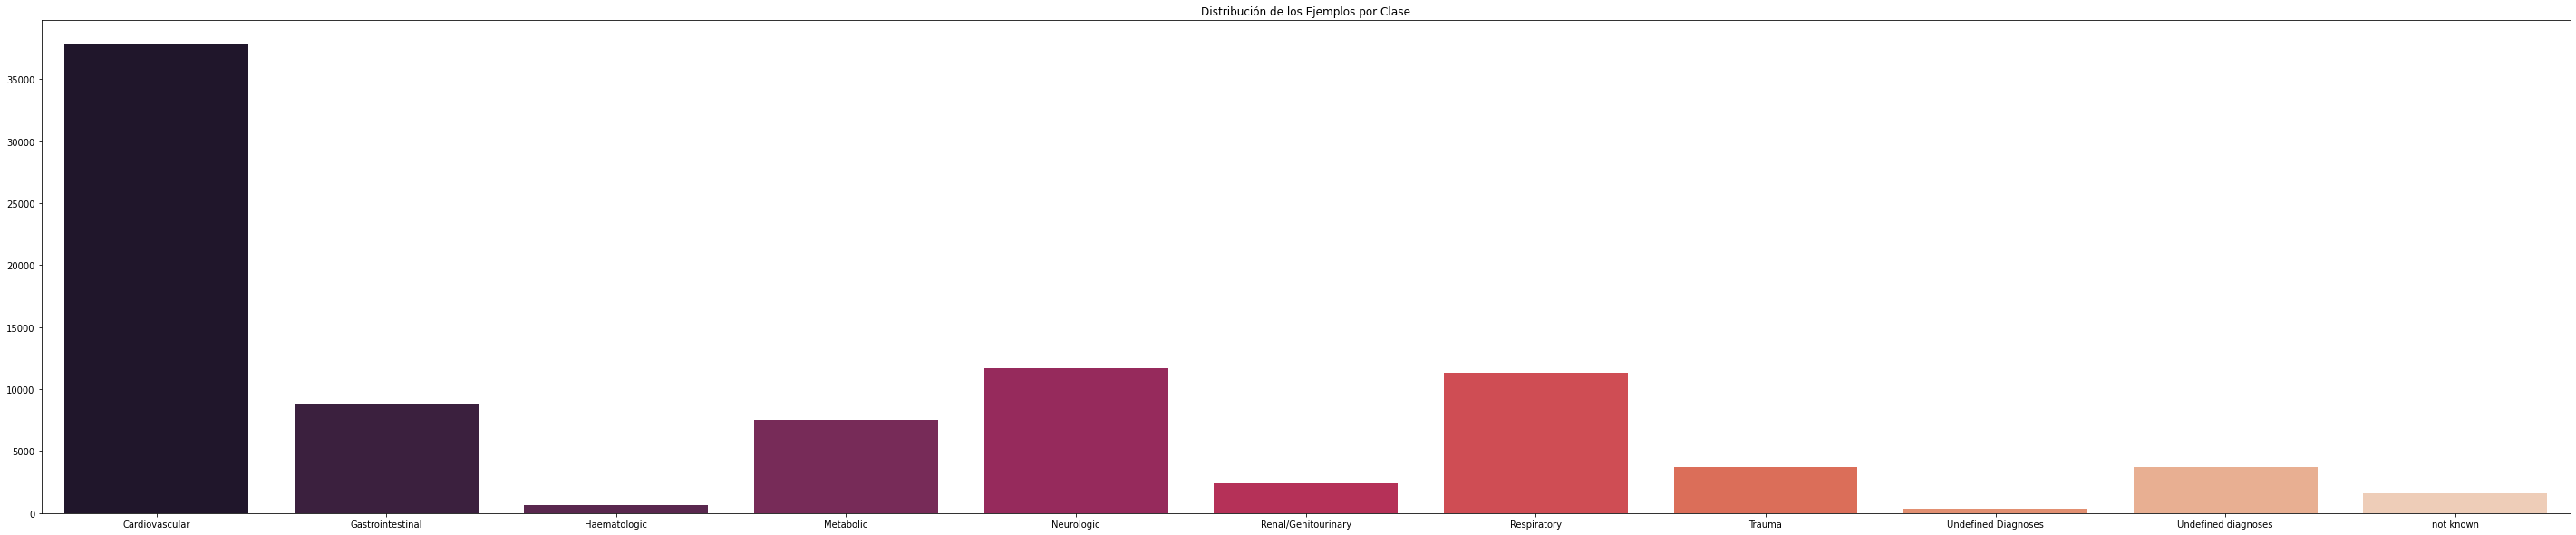

In [ ]:
for columna in newdf2.columns:
  clases, frecuencia = np.unique(df[columna], return_counts=True)

  fig, ax = plt.subplots(figsize=(50,10),nrows=1)
  p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
  ax.set_title('Distribución de los Ejemplos por Clase')
  plt.show()

Tenemos un dataset desbalanceado por lo que posteriormente ocuparemos pesos para darle más importancia a la variable de interés

In [ ]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.0,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.00000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89713 entries, 0 to 89712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 127.3+ MB


In [ ]:
df_dummies=pd.get_dummies(newdf2)

In [ ]:
df=df.drop(columns=newdf2.columns)

In [ ]:
df=pd.concat([df,df_dummies],axis=1)

In [ ]:
df.to_csv("/content/drive/My Drive/Machine learning/df_preliminar_desafio_3_ML.csv")

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Machine learning/df_preliminar_desafio_3_ML.csv")

In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,98554,3413,60,0,67.813742,28.357077,0,154.90,538,0.201389,...,1,0,0,0,0,0,0,0,0,0
1,70232,19980,139,0,67.813742,24.547793,1,154.90,684,0.399306,...,1,0,0,0,0,0,0,0,0,0
2,24701,54659,39,0,67.813742,24.284760,1,172.70,619,5.056944,...,0,0,0,0,0,0,0,0,0,1
3,68593,8469,176,0,67.813742,35.045481,0,144.80,628,0.000000,...,1,0,0,0,0,0,0,0,0,0
4,103103,124128,182,0,67.813742,19.010652,0,180.30,506,6.089583,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89708,52840,14469,188,0,67.813742,14.844926,0,170.20,840,0.000000,...,0,0,0,0,0,0,0,0,0,0
89709,107834,123189,19,1,63.000000,25.148009,0,177.80,646,0.132639,...,0,0,0,0,1,0,0,0,0,0
89710,125869,107796,21,0,67.813742,25.369438,1,177.80,512,0.294444,...,1,0,0,0,0,0,0,0,0,0
89711,115795,105886,10,0,67.813742,31.703948,1,185.42,425,0.004861,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
def outlier_count(col, data,booleano):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    if booleano:
      print('Número de outliers: {}'.format(outlier_count))
      print('Porcentaje de la data que es outlier: {}%'.format(outlier_percent))
    else:
      return(min_val,max_val)
for col in newdf.columns:
  outlier_count(col,newdf,True)

---------------encounter_id---------------
Número de outliers: 0
Porcentaje de la data que es outlier: 0.0%
---------------patient_id---------------
Número de outliers: 0
Porcentaje de la data que es outlier: 0.0%
---------------hospital_id---------------
Número de outliers: 0
Porcentaje de la data que es outlier: 0.0%
---------------hospital_death---------------
Número de outliers: 6915
Porcentaje de la data que es outlier: 7.71%
---------------age---------------
Número de outliers: 0
Porcentaje de la data que es outlier: 0.0%
---------------bmi---------------
Número de outliers: 0
Porcentaje de la data que es outlier: 0.0%
---------------elective_surgery---------------
Número de outliers: 16615
Porcentaje de la data que es outlier: 18.52%
---------------height---------------
Número de outliers: 0
Porcentaje de la data que es outlier: 0.0%
---------------icu_id---------------
Número de outliers: 0
Porcentaje de la data que es outlier: 0.0%
---------------pre_icu_los_days--------------

Como son muchos outliers para algunas variables omitimos la limpieza de datos. También valores atípicos pueden ser influyentes en la variable de interés.

Correlación entre las variables

In [ ]:
df.corr()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
encounter_id,1.000000,-0.009355,-0.004479,-0.004542,0.003490,-0.000373,0.001678,0.000852,-0.000588,-0.001018,...,-0.003046,0.003901,0.000711,-0.001996,0.000365,-0.001517,0.002181,0.000340,-0.002067,0.000795
patient_id,-0.009355,1.000000,-0.006586,0.005489,0.001623,-0.000957,0.000747,0.001934,-0.001893,-0.003800,...,0.001318,-0.001889,0.001642,-0.000074,-0.000677,0.001795,-0.000291,0.001580,0.005836,-0.000299
hospital_id,-0.004479,-0.006586,1.000000,-0.001437,-0.003523,0.012065,0.053069,0.024283,0.003733,-0.000573,...,0.048884,-0.029920,-0.007709,-0.007263,-0.039802,-0.012292,-0.021104,0.020225,-0.004050,0.031239
hospital_death,-0.004542,0.005489,-0.001437,1.000000,0.045457,-0.027529,-0.086677,-0.031234,-0.001765,0.061762,...,0.063508,-0.013876,0.002763,-0.073159,-0.007968,-0.017277,0.033691,-0.014765,-0.007069,-0.045842
age,0.003490,0.001623,-0.003523,0.045457,1.000000,-0.042671,0.006260,-0.017150,-0.003621,0.009740,...,0.011246,0.001371,-0.005033,-0.024509,0.003855,0.000441,0.015352,-0.026708,-0.000520,0.002391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apache_2_bodysystem_Renal/Genitourinary,-0.001517,0.001795,-0.012292,-0.017277,0.000441,0.039641,0.043070,-0.011374,-0.000794,0.004960,...,-0.142536,-0.055158,-0.014012,-0.050474,-0.064465,1.000000,-0.063320,-0.034803,-0.010330,-0.034677
apache_2_bodysystem_Respiratory,0.002181,-0.000291,-0.021104,0.033691,0.015352,0.018340,-0.068986,-0.004550,0.012281,0.046391,...,-0.324593,-0.125609,-0.031908,-0.114943,-0.146804,-0.063320,1.000000,-0.079256,-0.023525,-0.078969
apache_2_bodysystem_Trauma,0.000340,0.001580,0.020225,-0.014765,-0.026708,-0.048292,-0.034803,0.005000,0.047437,-0.043922,...,-0.178410,-0.069040,-0.017538,-0.063178,-0.080690,-0.034803,-0.079256,1.000000,-0.012930,-0.043405
apache_2_bodysystem_Undefined Diagnoses,-0.002067,0.005836,-0.004050,-0.007069,-0.000520,0.017506,-0.028606,-0.004663,0.006819,-0.007232,...,-0.052956,-0.020492,-0.005206,-0.018752,-0.023950,-0.010330,-0.023525,-0.012930,1.000000,-0.012883


In [ ]:
df.corr()['hospital_death']

encounter_id                              -0.004542
patient_id                                 0.005489
hospital_id                               -0.001437
hospital_death                             1.000000
age                                        0.045457
                                             ...   
apache_2_bodysystem_Renal/Genitourinary   -0.017277
apache_2_bodysystem_Respiratory            0.033691
apache_2_bodysystem_Trauma                -0.014765
apache_2_bodysystem_Undefined Diagnoses   -0.007069
apache_2_bodysystem_Undefined diagnoses   -0.045842
Name: hospital_death, Length: 237, dtype: float64

Ordenamos las correlaciones para hacer un ranking de las variables más importantes

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [ ]:
df_ranking=pd.DataFrame(np.argsort(np.flip(np.abs(newdf.corr()['hospital_death']))).head(10))

In [ ]:
df_ranking2=pd.DataFrame()
df_ranking2['Variable']=df_ranking.index
df_ranking2.index=[i for i in range(1,11)]
df_ranking2

,Variable
1,apache_2_bodysystem_Undefined diagnoses
2,apache_2_bodysystem_Undefined Diagnoses
3,apache_2_bodysystem_Trauma
4,apache_2_bodysystem_Respiratory
5,apache_2_bodysystem_Renal/Genitourinary
6,apache_2_bodysystem_Neurologic
7,apache_2_bodysystem_Metabolic
8,apache_2_bodysystem_Haematologic
9,apache_2_bodysystem_Gastrointestinal
10,apache_2_bodysystem_Cardiovascular


Solo obtuvimos el ranking de las correlaciones pues el Z-score es proporcional a la correlación, por lo que nos entrega la misma información.

#Modelos

Empezaremos con un modelo ampliamente conocido por ser de ensamblado que es Random Forest, si bien este modelo es propenso a overfitting, lo regularemos con la funcion GridSearchCV, la cual contiene K-folds y evalua dentro de esta el conjunto de train y test. La elección de este modelo se debe a que Random Forest da buenos resultados con muchas variables. Posteriormente una Regresión logística para verificar si el dataset es linealmente separable, en caso de error de test bajo, es debido a la no linealidad de las variables y admeás por temas de tiempo de ejecución

Importamos lo necesario

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [ ]:
X=df.drop(columns=['hospital_death']).values
y=df['hospital_death'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,shuffle=True)

Aplicamos una transformación llamada Yeo Jhonson para agregarle normalidad a las variables, como vimos algunas variables no presentaban una distribución normal por lo que es necesario aplicarla antes de un StandardScaler

In [ ]:
power_scaler=PowerTransformer()
X_train=power_scaler.fit_transform(X_train)
X_test=power_scaler.transform(X_test)
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


#Random Forest

In [ ]:
model=RandomForestClassifier()
param_grid={'max_depth':[i for i in range(10,40,5)],'class_weight':['balanced'],'random_state':[1],'max_features':['sqrt','log2'],'oob_score':[True],'bootstrap':[True]}
rf_cv=GridSearchCV(model,param_grid,verbose=2,scoring='f1')
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, oob_score=True, random_state=1; total time=  35.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, oob_score=True, random_state=1; total time=  23.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, oob_score=True, random_state=1; total time=  25.9s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, oob_score=True, random_state=1; total time=  23.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=sqrt, oob_score=True, random_state=1; total time=  26.7s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, oob_score=True, random_state=1; total time=  13.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, oob_score=True, random_state=1; total time=  13.8s
[CV] END bootst

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [10, 15, 20, 25, 30, 35],
                         'max_features': ['sqrt', 'log2'], 'oob_score': [True],
                         'random_state': [1]},
             scoring='f1', verbose=2)

In [ ]:
rf_cv.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 'sqrt',
 'oob_score': True,
 'random_state': 1}

In [ ]:
f1_score(rf_cv.best_estimator_.predict(X_test),y_test)

0.7494858083093376

Seleccionamos las variables más importantes para RandomForest 

In [ ]:
import pickle
loaded_model = pickle.load(open('/content/drive/My Drive/Machine learning/model1_2.sav', 'rb'))

In [ ]:
variables=np.flip(np.argsort(loaded_model.feature_importances_))

In [ ]:
valores=np.flip(np.sort(loaded_model.feature_importances_))

In [ ]:
df.drop(columns=['hospital_death']).columns[variables][:10]

Index(['age', 'apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob',
       'ventilated_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'd1_sysbp_min', 'gcs_eyes_apache', 'd1_sysbp_noninvasive_min',
       'd1_lactate_min'],
      dtype='object')

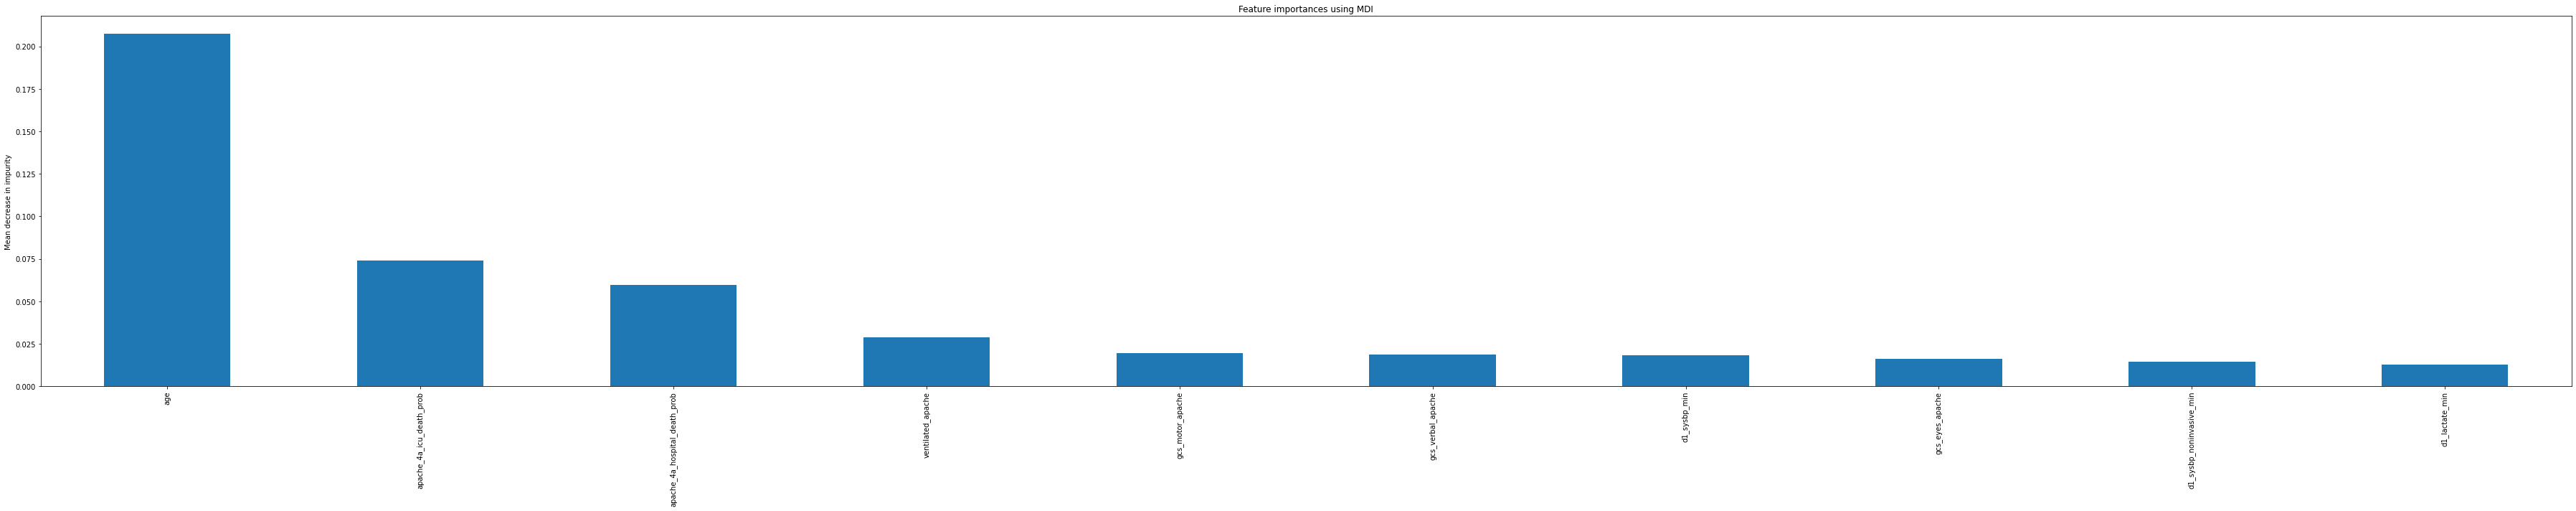

In [ ]:
forest_importances = pd.Series(valores[:10], index=df.drop(columns=['hospital_death']).columns[variables[:10]])
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(50)
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
import pickle
pickle.dump(model, open('/content/drive/My Drive/Machine learning/model1_2.sav', 'wb'))

Como vemos el ranking de las variables con correlación lineal no coincide con las variables mas importantes para Random Forest, esto debido a la no linealidad presente en el modelo.

#Regresión Logística

In [ ]:
model2=LogisticRegression()
param_grid={'class_weight':['balanced'],'random_state':[1],'solver':['newton-cg', 'lbfgs', 'liblinear'],'C':[i for i in range(1,5)]}
lr_cv=GridSearchCV(model2,param_grid,verbose=2,scoring='f1')
lr_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END C=1, class_weight=balanced, random_state=1, solver=newton-cg; total time=  40.3s
[CV] END C=1, class_weight=balanced, random_state=1, solver=newton-cg; total time=  30.3s
[CV] END C=1, class_weight=balanced, random_state=1, solver=newton-cg; total time=  28.8s
[CV] END C=1, class_weight=balanced, random_state=1, solver=newton-cg; total time=  36.1s
[CV] END C=1, class_weight=balanced, random_state=1, solver=newton-cg; total time=  32.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=1, class_weight=balanced, random_state=1, solver=lbfgs; total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=1, class_weight=balanced, random_state=1, solver=lbfgs; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=1, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=1, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=1, class_weight=balanced, random_state=1, solver=lbfgs; total time=   5.0s
[CV] END C=1, class_weight=balanced, random_state=1, solver=liblinear; total time=  34.9s
[CV] END C=1, class_weight=balanced, random_state=1, solver=liblinear; total time=  33.5s
[CV] END C=1, class_weight=balanced, random_state=1, solver=liblinear; total time=  48.3s
[CV] END C=1, class_weight=balanced, random_state=1, solver=liblinear; total time=  38.4s
[CV] END C=1, class_weight=balanced, random_state=1, solver=liblinear; total time=  44.7s
[CV] END C=2, class_weight=balanced, random_state=1, solver=newton-cg; total time=  40.4s
[CV] END C=2, class_weight=balanced, random_state=1, solver=newton-cg; total time=  36.2s
[CV] END C=2, class_weight=balanced, random_state=1, solver=newton-cg; total time=  52.3s
[CV] END C=2, class_weight=balanced, random_state=1, solver=newton-cg; total time=  56.2s
[CV] END C=2, class_weight=balanced, random_state=1, solver=newton-cg; total time=  42.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=2, class_weight=balanced, random_state=1, solver=lbfgs; total time=   6.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=2, class_weight=balanced, random_state=1, solver=lbfgs; total time=   5.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=2, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=2, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=2, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.8s
[CV] END C=2, class_weight=balanced, random_state=1, solver=liblinear; total time=  58.0s
[CV] END C=2, class_weight=balanced, random_state=1, solver=liblinear; total time=  51.0s
[CV] END C=2, class_weight=balanced, random_state=1, solver=liblinear; total time=  36.7s
[CV] END C=2, class_weight=balanced, random_state=1, solver=liblinear; total time=  51.6s
[CV] END C=2, class_weight=balanced, random_state=1, solver=liblinear; total time=  41.5s
[CV] END C=3, class_weight=balanced, random_state=1, solver=newton-cg; total time= 1.1min
[CV] END C=3, class_weight=balanced, random_state=1, solver=newton-cg; total time=  41.7s
[CV] END C=3, class_weight=balanced, random_state=1, solver=newton-cg; total time=  43.8s
[CV] END C=3, class_weight=balanced, random_state=1, solver=newton-cg; total time=  37.7s
[CV] END C=3, class_weight=balanced, random_state=1, solver=newton-cg; total time=  33.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=3, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=3, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=3, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=3, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=3, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.1s
[CV] END C=3, class_weight=balanced, random_state=1, solver=liblinear; total time=  38.7s
[CV] END C=3, class_weight=balanced, random_state=1, solver=liblinear; total time=  37.7s
[CV] END C=3, class_weight=balanced, random_state=1, solver=liblinear; total time=  29.2s
[CV] END C=3, class_weight=balanced, random_state=1, solver=liblinear; total time=  38.9s
[CV] END C=3, class_weight=balanced, random_state=1, solver=liblinear; total time=  29.9s
[CV] END C=4, class_weight=balanced, random_state=1, solver=newton-cg; total time=  36.8s
[CV] END C=4, class_weight=balanced, random_state=1, solver=newton-cg; total time=  36.3s
[CV] END C=4, class_weight=balanced, random_state=1, solver=newton-cg; total time=  39.9s
[CV] END C=4, class_weight=balanced, random_state=1, solver=newton-cg; total time=  38.7s
[CV] END C=4, class_weight=balanced, random_state=1, solver=newton-cg; total time=  36.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=4, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=4, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=4, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=4, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END C=4, class_weight=balanced, random_state=1, solver=lbfgs; total time=   3.1s
[CV] END C=4, class_weight=balanced, random_state=1, solver=liblinear; total time=  40.5s
[CV] END C=4, class_weight=balanced, random_state=1, solver=liblinear; total time=  39.0s
[CV] END C=4, class_weight=balanced, random_state=1, solver=liblinear; total time=  42.8s
[CV] END C=4, class_weight=balanced, random_state=1, solver=liblinear; total time=  47.1s
[CV] END C=4, class_weight=balanced, random_state=1, solver=liblinear; total time=  46.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4], 'class_weight': ['balanced'],
                         'random_state': [1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1', verbose=2)

In [ ]:
f1_score(lr_cv.best_estimator_.predict(X_test),y_test)

0.41515901733003235

In [ ]:
import pickle
pickle.dump(model, open('/content/drive/My Drive/Machine learning/model2.sav', 'wb'))

In [ ]:
import pickle
model = pickle.load(open('/content/drive/My Drive/Machine learning/model1.sav', 'rb'))

Debido a la no linealidad que se puede apreciar en el error de test de la Regresión Logística, el dataset no es linealmente separable, por lo que Random Forest nos entrega mejores resultados

#Entrenamiento del mejor modelo

Entrenamos el mejor modelo (con sus hiperparametros respectivos) con todos los datos 

In [ ]:
scaler=PowerTransformer()
X=scaler.fit_transform(X)
standard_scaler=StandardScaler()
X=standard_scaler.fit_transform(X)

In [ ]:
model_final=RandomForestClassifier(class_weight= 'balanced',
 max_depth= 15,
 max_features= 'sqrt',
 oob_score= True,
 random_state= 1,
 bootstrap=True)
model_final.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       max_features='sqrt', oob_score=True, random_state=1)

Obtenemos el mejor modelo (Random Forest), por lo que estimaremos el error de predicción usando OOB

In [ ]:
model_final.oob_score_

0.9646428053905232

#Predicciones

In [ ]:
df_test=pd.read_csv("/content/df_test.csv")

In [ ]:
df_test

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,40457,97105,70,75.0,39.393869,0,Caucasian,M,149.80,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
1,107569,17796,188,77.0,31.257801,0,Caucasian,F,154.90,Direct Admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
2,47462,75743,70,85.0,20.429418,0,African American,F,158.00,Emergency Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
3,90920,81758,32,87.0,25.969529,0,Caucasian,F,152.00,Emergency Department,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
4,120041,35432,181,56.0,27.140871,0,Caucasian,M,177.80,Acute Care/Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Genitourinary,Renal/Genitourinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,80443,9930,89,67.0,28.146291,0,Caucasian,M,167.64,Direct Admit,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1996,48061,62216,21,80.0,33.604801,0,Caucasian,M,165.10,Emergency Department,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1997,38717,74885,39,73.0,34.399980,0,Caucasian,F,170.20,Direct Admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1998,16532,101841,171,58.0,33.641975,1,Caucasian,M,180.00,Operating Room,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [ ]:
def gender_values(x):
    if pd.isnull(x['gender']) and x['height']>mean_umbral:
      return 'M'
    elif pd.isnull(x['gender']) and x['height']<=mean_umbral:
      return 'F'
    else:
      return x['gender']

In [ ]:
mean_height_F=df_test[df_test['gender']=='F']['height'].mean()
mean_height_M=df_test[df_test['gender']=='M']['height'].mean()
std_height_F=df_test[df_test['gender']=='F']['height'].std()
std_height_M=df_test[df_test['gender']=='M']['height'].std()

In [ ]:
mean_umbral=(mean_height_F+std_height_F+mean_height_M-std_height_M)/2

In [ ]:
df_test['gender']=df_test.apply(gender_values,axis=1)

In [ ]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "lognorm", "chi", "gamma", "t"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        try:
          param = dist.fit(data)
        except:
          pass
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_test.select_dtypes(include=numerics)

In [ ]:
df_distribution=pd.DataFrame()
lista_distribucion=[]
for columna in newdf:
  columna_distribucion=pd.Series(newdf[pd.isnull(newdf[columna])==False][columna])
  lista_distribucion.append(get_best_distribution(columna_distribucion))

p value for norm = 3.971422300196084e-07
p value for lognorm = 1.4638515402186961e-06
p value for chi = 0.0
p value for gamma = 5.542489829633167e-07
p value for t = 3.923237110419105e-07
Best fitting distribution: lognorm
Best p value: 1.4638515402186961e-06
Parameters for the best fit: (0.05930639286275988, -568456.8829681913, 632679.6454302103)
p value for norm = 4.996376370236265e-08
p value for lognorm = 2.2913219093183743e-07
p value for chi = 0.0
p value for gamma = 5.885750621186822e-08
p value for t = 4.991702056894565e-08
Best fitting distribution: lognorm
Best p value: 2.2913219093183743e-07
Parameters for the best fit: (0.039283645988102356, -898450.239733394, 963704.9416075952)
p value for norm = 8.499271175151719e-19
p value for lognorm = 0.0
p value for chi = 5.803446063350543e-22
p value for gamma = 7.081632255437399e-19
p value for t = 8.268493051615062e-19
Best fitting distribution: norm
Best p value: 8.499271175151719e-19
Parameters for the best fit: (104.4615, 63.73

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1953: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


p value for lognorm = 0.0
p value for chi = 0.0
p value for gamma = 0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:406: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


p value for t = 0.0
Best fitting distribution: norm
Best p value: nan
Parameters for the best fit: (0.0, 0.0)
p value for norm = 9.715492178941827e-10
p value for lognorm = 0.2152850174314057
p value for chi = 0.0
p value for gamma = 0.19396374162086827
p value for t = 3.2087671321956022e-06
Best fitting distribution: lognorm
Best p value: 0.2152850174314057
Parameters for the best fit: (0.3466141284917536, 9.466859550129744, 69.15390300418036)
p value for norm = 0.10222814139941849
p value for lognorm = 0.0945050702293817
p value for chi = 0.06335384003648237
p value for gamma = 0.1012409959505517
p value for t = 0.10211520850013722
Best fitting distribution: norm
Best p value: 0.10222814139941849
Parameters for the best fit: (2.6797149122807014, 0.7011384272478501)
p value for norm = 3.6395524811233705e-236
p value for lognorm = 2.745212639926342e-81
p value for chi = 1.874043534438876e-155
p value for gamma = 8.09827286982944e-133
p value for t = 3.148957639567448e-236
Best fitting 

In [ ]:
from scipy.stats import t,norm,lognorm,chi,gamma
diccionario={}
cont=0
for columna in newdf.columns:
  if lista_distribucion[cont][0]=='norm':
    expected=norm.expect(loc=lista_distribucion[cont][2][0],scale=lista_distribucion[cont][2][1])
  elif lista_distribucion[cont][0]=='lognorm':
    expected=lognorm.expect(args=(lista_distribucion[cont][2][0],),loc=lista_distribucion[cont][2][1],scale=lista_distribucion[cont][2][2])
  elif lista_distribucion[cont][0]=='chi':
    expected=chi.expect(args=(lista_distribucion[cont][2][0],),loc=lista_distribucion[cont][2][1],scale=lista_distribucion[cont][2][2])
  elif lista_distribucion[cont][0]=='gamma':
    expected=gamma.expect(args=(lista_distribucion[cont][2][0],),loc=lista_distribucion[cont][2][1],scale=lista_distribucion[cont][2][2])
  elif lista_distribucion[cont][0]=='t':
    expected=t.expect(args=(lista_distribucion[cont][2][0],),loc=lista_distribucion[cont][2][1],scale=lista_distribucion[cont][2][2])
  diccionario[columna]=expected
  cont+=1

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2727: RuntimeWarning: invalid value encountered in double_scalars
  lb = loc + _a * scale
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2729: RuntimeWarning: invalid value encountered in double_scalars
  ub = loc + _b * scale
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2738: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  vals = integrate.quad(fun, lb, ub, **kwds)[0] / invfac


In [ ]:
for columna in newdf:
  if diccionario[columna]!=np.nan:
    df_test[columna]=df_test[columna].replace(np.nan,diccionario[columna])
  else:
    df_test[columna]=df_test[columna].replace(np.nan,df_test[columna].median())

In [ ]:
newdf2 = df_test.select_dtypes(object)

In [ ]:
newdf2

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,NaN,Other Hospital,admit,CCU-CTICU,Cardiovascular,Cardiovascular
1,Caucasian,F,Direct Admit,Accident & Emergency,admit,Neuro ICU,Trauma,Trauma
2,African American,F,Emergency Department,Accident & Emergency,admit,CCU-CTICU,Respiratory,Respiratory
3,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Sepsis,Cardiovascular
4,Caucasian,M,Acute Care/Floor,Floor,admit,Med-Surg ICU,Genitourinary,Renal/Genitourinary
...,...,...,...,...,...,...,...,...
1995,Caucasian,M,Direct Admit,Accident & Emergency,admit,Med-Surg ICU,Sepsis,Cardiovascular
1996,Caucasian,M,Emergency Department,Accident & Emergency,admit,SICU,Neurological,Neurologic
1997,Caucasian,F,Direct Admit,Accident & Emergency,admit,Neuro ICU,Sepsis,Cardiovascular
1998,Caucasian,M,Operating Room,Operating Room / Recovery,admit,CSICU,Cardiovascular,Cardiovascular


In [ ]:
for columna in newdf2:
  df_test[columna]=df_test[columna].replace(np.nan,'not known')

In [ ]:
df_dummies=pd.get_dummies(newdf2)

In [ ]:
df_test=df_test.drop(columns=newdf2.columns)

In [ ]:
df_test=pd.concat([df_test,df_dummies],axis=1)

In [ ]:
df_test.dropna()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,40457,97105,70,75.0,39.393869,0,149.80,464,0.002778,0,...,1,0,0,0,0,0,0,0,0,0
1,107569,17796,188,77.0,31.257801,0,154.90,889,0.100000,0,...,0,0,0,0,0,0,0,1,0,0
2,47462,75743,70,85.0,20.429418,0,158.00,464,0.112500,0,...,0,0,0,0,0,0,1,0,0,0
3,90920,81758,32,87.0,25.969529,0,152.00,369,0.079167,0,...,1,0,0,0,0,0,0,0,0,0
4,120041,35432,181,56.0,27.140871,0,177.80,814,0.585417,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,80443,9930,89,67.0,28.146291,0,167.64,133,0.000000,0,...,1,0,0,0,0,0,0,0,0,0
1996,48061,62216,21,80.0,33.604801,0,165.10,504,0.093056,0,...,0,0,0,0,1,0,0,0,0,0
1997,38717,74885,39,73.0,34.399980,0,170.20,616,0.000000,0,...,1,0,0,0,0,0,0,0,0,0
1998,16532,101841,171,58.0,33.641975,1,180.00,404,0.001389,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.to_csv("/content/drive/My Drive/df_test_desafio_3.csv")

In [ ]:
df_test=pd.read_csv("/content/drive/My Drive/df_test_desafio_3.csv")

In [ ]:
df_test=df_test.drop(columns=['Unnamed: 0'])

In [ ]:
df_test['hospital_admit_source_Observation']=[0]*len(df_test)
df_test['hospital_admit_source_Other']=[0]*len(df_test)

In [ ]:
df_test = df_test.reindex(columns=df.drop(columns=['hospital_death']).columns)

In [ ]:
values=scaler.transform(df_test.values)
values_final=standard_scaler.transform(values)

In [ ]:
predict=model_final.predict(values_final)

In [ ]:
df_final=pd.DataFrame()
df_final['encounter_id']=df_test['encounter_id']
df_final['hospital_death']=predict

In [ ]:
df_final['hospital_death'][df_final['hospital_death']==1]

1       1
2       1
3       1
5       1
7       1
       ..
1994    1
1995    1
1996    1
1997    1
1999    1
Name: hospital_death, Length: 917, dtype: int64

In [ ]:
df_final

,encounter_id,hospital_death
0,40457,0
1,107569,1
2,47462,1
3,90920,1
4,120041,0
...,...,...
1995,80443,1
1996,48061,1
1997,38717,1
1998,16532,0


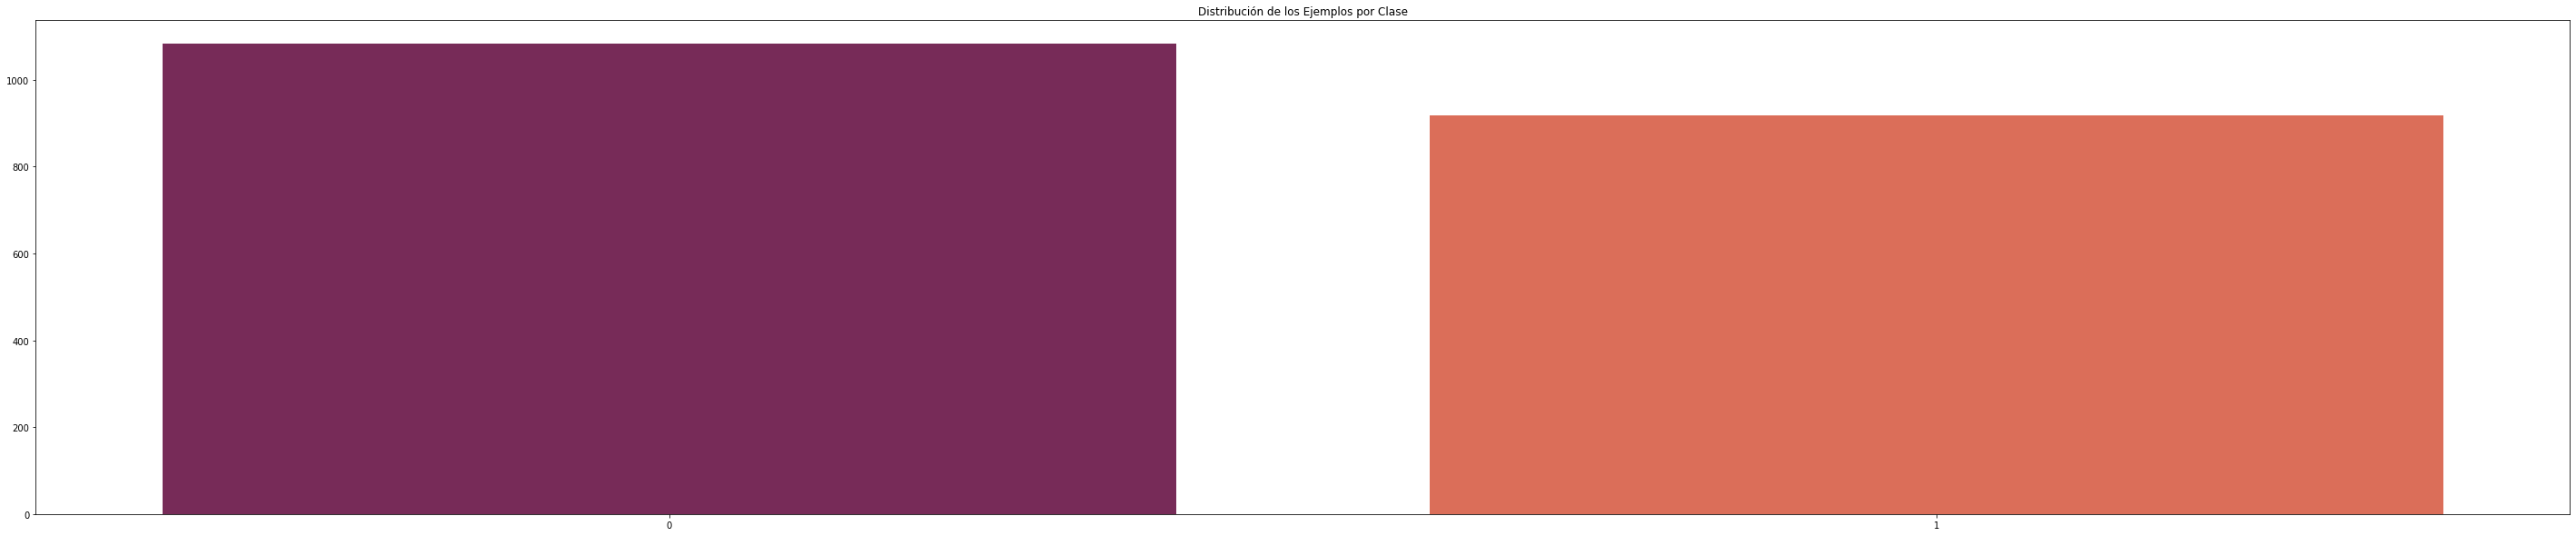

In [ ]:
clases, frecuencia = np.unique(df_final['hospital_death'], return_counts=True)

fig, ax = plt.subplots(figsize=(50,10),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

In [ ]:
df_final.to_csv("df_desafio_3.csv",index=False)

Finalmente el modelo que se ajusta mejor a los datos es un Random Forest con los siguientes hiperparámetros

In [ ]:
pd.DataFrame({'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 'sqrt',
 'oob_score': True,
 'random_state': 1,
 'bootstrap':True},index=[0])

,class_weight,max_depth,max_features,oob_score,random_state,bootstrap
0,balanced,15,sqrt,True,1,True


El cual posee un error de test (medido con f1-score) de 0.7495